<h1> Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datascience as ds
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

#inline matplotlib
%matplotlib inline

In [ ]:
%%capture
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/week 4 masters/MELBOURNE_HOUSE_PRICES_LESS.csv')

# 1.Understand The Data

Attribute explanation: 

- Suburb: Suburb

- Address: Address

- Rooms: Number of rooms

- Price: Price in Australian dollars

- Method:
 - S - property sold;
 - SP - property sold prior;
 - PI - property passed in;
 - PN - sold prior not disclosed;
 - SN - sold not disclosed;
 - NB - no bid;
 - VB - vendor bid;
 - W - withdrawn prior to auction;
 - SA - sold after auction;
 - SS - sold after auction price not disclosed.
 - N/A - price or highest bid not available.

- Type:
  - br - bedroom(s);
  - h - house,cottage,villa, semi,terrace;
  - u - unit, duplex;
  - t - townhouse;
  - dev site - development site;
  - o res - other residential.

- SellerG: Real Estate Agent

- Date: Date sold

- Distance: Distance from CBD in Kilometres

- Regionname: General Region (West, North West, North, North east …etc)

- Propertycount: Number of properties that exist in the suburb.

- Bathroom: Number of Bathrooms

- CouncilArea: Governing council for the area


- The purpose of this notebook is to predict "House Price". In this sense, our problem can be solved using Linear Regression

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [ ]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

<h2> Dropping all rows that don't have a price

In [ ]:
df_FullPrice = df[df['Price'].isna() == False]

<h2> No null values anymore

In [ ]:
df_FullPrice.isna().sum().sort_values(ascending=False)

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Postcode         0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
dtype: int64

In [ ]:
df_FullPrice.describe()

,Rooms,Price,Postcode,Propertycount,Distance
count,48433.000000,4.843300e+04,48433.000000,48433.000000,48433.000000
mean,3.071666,9.978982e+05,3123.210332,7566.399913,12.702761
std,0.944708,5.934989e+05,125.534940,4457.405884,7.550030
min,1.000000,8.500000e+04,3000.000000,39.000000,0.000000
25%,2.000000,6.200000e+05,3051.000000,4280.000000,7.000000
50%,3.000000,8.300000e+05,3103.000000,6567.000000,11.700000
75%,4.000000,1.220000e+06,3163.000000,10412.000000,16.700000
max,31.000000,1.120000e+07,3980.000000,21650.000000,55.800000


(0.0, 5000000.0)

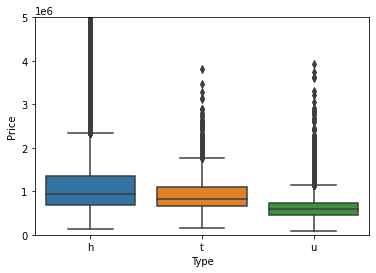

In [ ]:
#boxplot get average price per type 
sns.boxplot(x='Type', y='Price', data=df_FullPrice)
plt.ylim(0, 5000000)

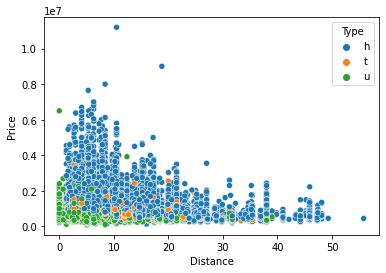

In [ ]:
sns.scatterplot(x='Distance', y='Price', data=df_FullPrice, hue='Type')

In [ ]:
df_FullPrice['Type'].value_counts()

h    34161
u     9292
t     4980
Name: Type, dtype: int64

In [ ]:
Type = df_FullPrice['Type']
df_FullPrice = pd.get_dummies(df_FullPrice, columns=['Type'], drop_first = True)
df_FullPrice['Type'] = Type
df_FullPrice.head(10)

,Suburb,Address,Rooms,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,Type_t,Type_u,Type
0,Abbotsford,49 Lithgow St,3,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,0,0,h
1,Abbotsford,59A Turner St,3,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,0,0,h
2,Abbotsford,119B Yarra St,3,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,0,0,h
3,Aberfeldie,68 Vida St,3,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council,0,0,h
4,Airport West,92 Clydesdale Rd,2,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,0,0,h
5,Airport West,4/32 Earl St,2,530000.0,S,Jellis,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,1,0,t
6,Airport West,3/74 Hawker St,2,540000.0,S,Barry,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,0,1,u
7,Airport West,1/26 Highridge Cr,3,715000.0,SP,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,0,0,h
9,Albert Park,18 Mills St,3,1925000.0,S,Cayzer,1/04/2017,3206,Southern Metropolitan,3280,3.0,Port Phillip City Council,0,0,h
10,Albion,3/15 Drummartin St,3,515000.0,S,Douglas,1/04/2017,3020,Western Metropolitan,2185,10.5,Brimbank City Council,0,1,u


In [ ]:
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot


def qq_plots(df):
    plt.figure(figsize=(10, 4))
    qqplot(df,line='s')
    plt.title("Normal QQPlot")
    plt.show()


<Figure size 720x288 with 0 Axes>

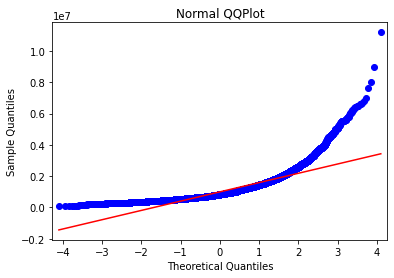

In [ ]:
qq_plots(df_FullPrice['Price'])

In [ ]:
df_FullPrice['PriceO'] = df_FullPrice['Price']
df_FullPrice['Price'] = np.log1p(df_FullPrice['Price'])

<Figure size 720x288 with 0 Axes>

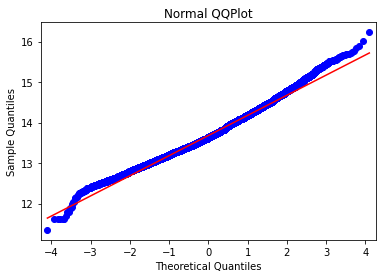

In [ ]:
qq_plots(df_FullPrice['Price'])

# 2.Handling the Categorical Features


### 2.1 Handling Cyclic Features

In [ ]:
def encode(data, col, max_val):
    df_FullPrice[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    df_FullPrice[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return df_FullPrice

df_FullPrice['year'] = pd.DatetimeIndex(df_FullPrice['Date']).year
df_FullPrice['month'] = pd.DatetimeIndex(df_FullPrice['Date']).month
#Handling the Cyclic Features

df_FullPrice = encode(df_FullPrice, 'month', 12)
#Normalize the year
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_FullPrice['year_normalized']= min_max_scaler.fit_transform(df_FullPrice['year'].values.reshape(-1,1))

## 2.2 Handling the Ordinal Features

In [ ]:

print(df_FullPrice[df_FullPrice['Propertycount'] > 19500]['Suburb'].unique()) 
df_FullPrice[df_FullPrice['Propertycount'] > 19500]['Suburb'].shape #this is a very crowded suburb
#let's get the density of each suburb
print(len(df_FullPrice['Suburb'].unique()))
#get the average property count for each suburb
dfSubrub = df_FullPrice[['Propertycount', 'Suburb']].groupby('Suburb').mean()
print(dfSubrub.shape)
dfSubrub.head(5)
#convert two columns to a dict 
dfSubrub = dfSubrub.to_dict()
#get the average price for each suburb
dfSubrubPrice = df_FullPrice[['Price', 'Suburb']].groupby('Suburb').median()
dfSubrubPrice = dfSubrubPrice.sort_values(by = 'Price', ascending = False)
dfSubrubPrice.head()


['Reservoir']
370
(370, 1)


,Price
Suburb,
Deepdene,14.674284
Canterbury,14.557448
Malvern,14.508658
Albert Park,14.457365
Middle Park,14.446656


In [ ]:
#from this, we conclude that each suburb might have a different price range (this is logical, for example, you cannot expect the fifth settelemt to be cheaper than boulaq)

#let's ordinal encode the suburb column into a new column
indexOfSuburb = {}
#loop over dfSubrubPrice
for i in range(len(dfSubrubPrice)):
    indexOfSuburb[dfSubrubPrice.index[i]] = 370 - i

#create new column with the index of the suburb
df_FullPrice['SuburbIndex'] = df_FullPrice['Suburb'].map(indexOfSuburb)

## 2.3 Handling the Nominal Data

In [ ]:
df_FullPrice.select_dtypes(include=['object', 'category']).columns

Index(['Suburb', 'Address', 'Method', 'SellerG', 'Date', 'Regionname',
       'CouncilArea', 'Type'],
      dtype='object')

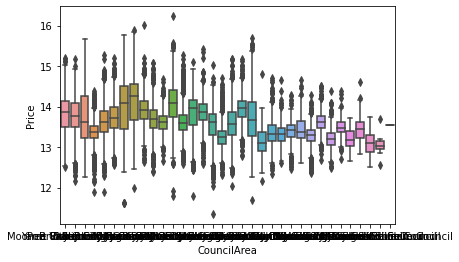

In [ ]:
#boxplot get average price per type 
sns.boxplot(x='CouncilArea', y='Price', data=df_FullPrice)


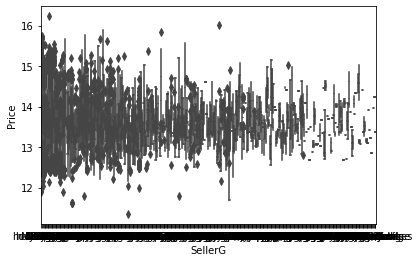

In [ ]:
#boxplot get average price per type 
sns.boxplot(x='SellerG', y='Price', data=df_FullPrice)


In [ ]:
np.unique(df_FullPrice['Method'])

array(['PI', 'S', 'SA', 'SP', 'VB'], dtype=object)

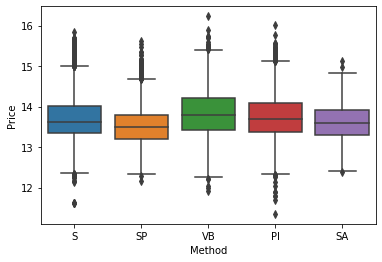

In [ ]:
#boxplot get average price per type 
sns.boxplot(x='Method', y='Price', data=df_FullPrice)


(array([30624.,     0.,  6480.,     0.,     0.,  5024.,     0.,  5940.,
            0.,   365.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

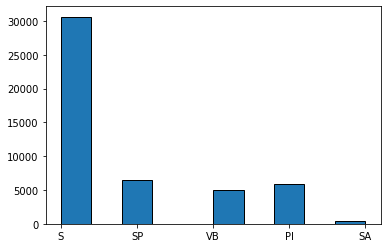

In [ ]:
plt.hist(x = df_FullPrice['Method'])

In [ ]:
# There is no relationship 
# Data is imbalanced, so I will not be able to use "Effect coding" neither "Mean Encoding"
#It is perferred to using dummey coding in this scenario '
Method = df_FullPrice['Method']
df_FullPrice = pd.get_dummies(df_FullPrice, columns=['Method'], drop_first = True)
df_FullPrice['Method'] = Method

## 3.Correlation


### 3.1 Handling the Continous Features

In [ ]:
# Implemented Functions to be called later 

def checkCorrelationWithIntervalVariables(df):
  continousVariableNames = df_FullPrice.select_dtypes(include=['int64', 'float64']).columns
  continousVariableNames = continousVariableNames.to_list()
  continousVariableNames.remove("Price")
  continousVariableNames.remove("PriceO")

  target = 'Price'
  ##Check the plot
  sns.pairplot(
    df,
    x_vars=continousVariableNames,
    y_vars=['Price'],
    )
  
  # correlation coefficient of each variable
  corr = df.corr()

  # correlation coefficent between predictor variables and 'SalePrice'
  corr_target = corr['Price']

  # show the correlation coefficent between predictor variables and 'SalePrice'
  corr_target.sort_values(ascending=False)
  ## HeatMap
  col_name = corr_target.keys()
  # get the correlation coefficient
  continousVariableNames.append("Price")
  corr_map = df[continousVariableNames].corr()

  # plot the heatmap
  plt.figure(figsize=(20,10))
  sns.heatmap(corr_map, square=True, annot=True)
  plt.show()




### 3.2Handling the Categorical Features

In [ ]:
df_FullPrice.drop('Address', inplace = True, axis = 1)
df_FullPrice.drop('SellerG', inplace = True, axis = 1)
df_FullPrice.drop('Date', inplace = True, axis = 1)

In [ ]:
df_FullPrice.drop('Suburb', inplace = True, axis = 1)

In [ ]:
CategoricalNames= df_FullPrice.select_dtypes(include=['object', 'category']).columns
CategoricalNames

Index(['Regionname', 'CouncilArea', 'Type', 'Method'], dtype='object')

In [ ]:
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
def HandlingCategoricalFeatures(df):
  #We need to check RegionName and CouncilArea with respect to the Price. 
  #Suburb has become ordinal numbers (ranking)
  #check if there is any dependence between regionName and CouncilArea
  cols = [ 'regionname','CouncilArea', 'Method', 'Type']

  #Make them numbers first 
  le = OrdinalEncoder()
  le.fit(df[cols])
  df[cols] = le.transform(df[cols])
  df[cols] = df[cols] + 1
  for idx in cols:
    for idx2 in cols: 
      if idx == idx2:
        continue
      else:
        CrosstabResult=pd.crosstab(index=df[idx],columns=df[idx2])
        print(CrosstabResult)
        stat, p, dof, expected = chi2_contingency(CrosstabResult)
        # interpret p-value
        alpha = 0.05
        print("p value is " + str(p))
        if p <= alpha:
            print('Dependent (reject H0)')
            #Check the strength of the correlation
            val = [idx,idx2]
            chisq_stat = stats.chi2_contingency(df[val], correction=False)[0]
            # sample size
            n = np.sum(np.sum(df[cols]))
            # minimum of rows & columns
            minshape = min(df[cols].shape)-1
            # Cramer's v
            V_ = np.sqrt( (chisq_stat/n)/minshape)
            print(f"Cramer' V: {V_}")
        else:
            print('Independent (H0 holds true)')

  #Plot each one alone
  fig, axs = plt.subplots(2, 2, figsize = (15,10))
  a = 0
  b = 0
  for i in cols: 
    sns.boxplot(ax = axs[a,b],x=i, y='Price', data=df)
    if a >= 1:
      a = 0
      b = b + 1
    elif a<=0:
      a = a + 1
  #Plot it with respect to the Price 
  
  sns.pairplot(
    df,
    x_vars=cols,
    y_vars=['Price'],
    )
  



# 4.Outlier detection 

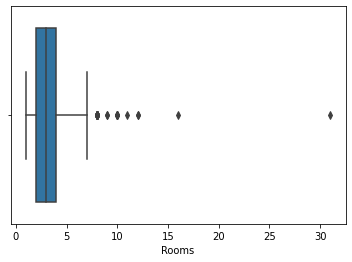

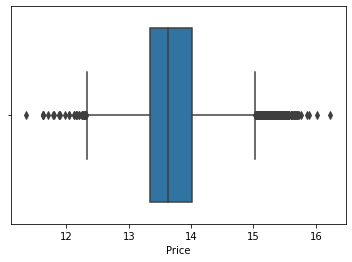

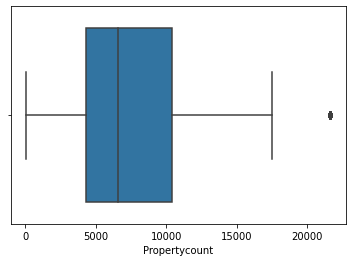

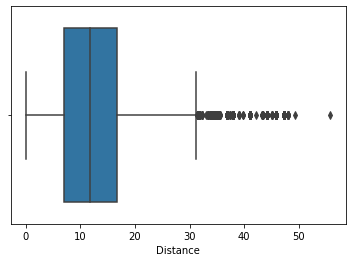

In [ ]:
#it's better to visualize your data before starting to get a hint on any outliers
cols = ['Rooms', 'Price', 'Propertycount', 'Distance']
for col in cols:
    sns.boxplot(x = col, data = df_FullPrice)
    plt.show()

In [ ]:
dfOriginal = df_FullPrice.copy() #keep a copy of the original data

In [ ]:
def hampel(dfr, col, threshold):
    med = dfr[col].median()
    print("Median: ", med)
    mad =  np.median(np.abs(dfr[col] - np.median(dfr[col])))
    print("MAD: ", mad)
    print("Low range: ", med - threshold*1.4826*mad)
    print("High range: ", med + threshold*1.4826*mad)
    dfc = dfr.copy()
    dfc = dfr[dfr[col]<med + threshold*1.4826*mad]
    dfc = dfc[dfc[col]>med - threshold*1.4826*mad]
    return dfc 

In [ ]:
df_test1 = dfOriginal.copy()

#removing outliers from the data using hampel filter
df_test1 = hampel(df_test1, 'Rooms', 3)



Median:  3.0
MAD:  1.0
Low range:  -1.4478
High range:  7.4478


In [ ]:
print(dfOriginal.shape[0] - df_test1.shape[0])


32


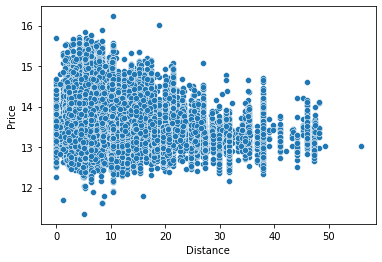

In [ ]:
sns.scatterplot(x = 'Distance', y = 'Price', data = df_test1) #we can see the downtrend of price as homes get farther away from the center of the city 

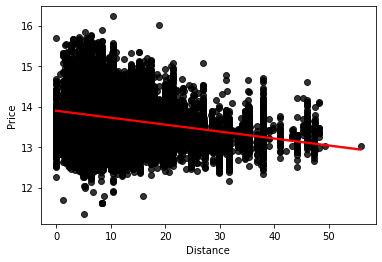

In [ ]:
#plot sns regression scatter with red line
sns.regplot(x = 'Distance', y = 'Price', data = df_test1,scatter_kws={"color": "black"}, line_kws={"color": "red"})

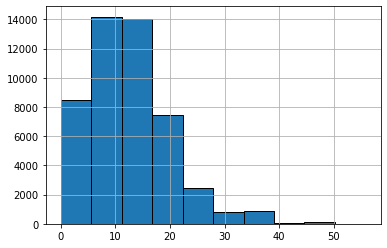

In [ ]:
df_test1['Distance'].hist()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


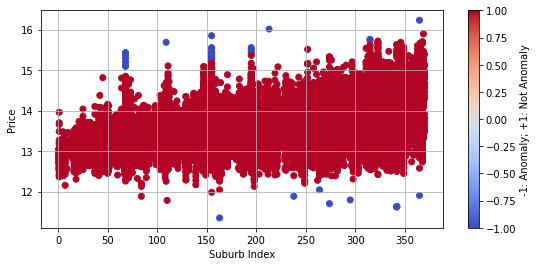

In [ ]:
from sklearn.covariance import EllipticEnvelope

# Define the Elliptic Envelope
el = EllipticEnvelope(store_precision=True, assume_centered=False, support_fraction=None, contamination=0.00075, random_state=0)
# Fit the data - this is where FastMCD is used by sklearn
d = df_test1[['SuburbIndex', 'Price']]
el.fit(d)
# Create column that shows anomaly status
d['ElipticEnevlopeResults'] = el.predict(d)
# Create scatterplot and color the anomalies differently
plt.figure(figsize = (9, 4))
ax = plt.scatter(d['SuburbIndex'], d['Price'], c = d['ElipticEnevlopeResults'], cmap = 'coolwarm')
plt.xlabel('Suburb Index')
plt.ylabel('Price')
plt.colorbar(label = '-1: Anomaly; +1: Not Anomaly')
plt.grid()

In [ ]:
d['ElipticEnevlopeResults'].sort_values(ascending = True).head(10)

35095   -1
23577   -1
31660   -1
3545    -1
560     -1
8867    -1
47201   -1
33339   -1
61142   -1
39374   -1
Name: ElipticEnevlopeResults, dtype: int64

In [ ]:
d['ElipticEnevlopeResults'].value_counts()
#merge the two dataframes on the index

df_test1 = pd.merge(df_test1, d['ElipticEnevlopeResults'], left_index=True, right_index=True)
df_test1.head()

,Rooms,Price,Postcode,Regionname,Propertycount,Distance,CouncilArea,Type_t,Type_u,Type,PriceO,year,month,month_sin,month_cos,year_normalized,SuburbIndex,Method_S,Method_SA,Method_SP,Method_VB,Method,ElipticEnevlopeResults
0,3,14.214287,3067,Northern Metropolitan,4019,3.0,Yarra City Council,0,0,h,1490000.0,2017,1,0.5,0.866025,0.5,277,1,0,0,0,S,1
1,3,14.014362,3067,Northern Metropolitan,4019,3.0,Yarra City Council,0,0,h,1220000.0,2017,1,0.5,0.866025,0.5,277,1,0,0,0,S,1
2,3,14.166168,3067,Northern Metropolitan,4019,3.0,Yarra City Council,0,0,h,1420000.0,2017,1,0.5,0.866025,0.5,277,1,0,0,0,S,1
3,3,14.230927,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council,0,0,h,1515000.0,2017,1,0.5,0.866025,0.5,336,1,0,0,0,S,1
4,2,13.415034,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,0,0,h,670000.0,2017,1,0.5,0.866025,0.5,167,1,0,0,0,S,1


In [ ]:
#session crashes everytime we run this cell due to unsufficent memory
import scipy as sp
def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = sp.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()


#df_test1['mahalanobis'] = mahalanobis(x=df_test1[colsMahal], data=df_test1[colsMahal])
#df_test1.head()

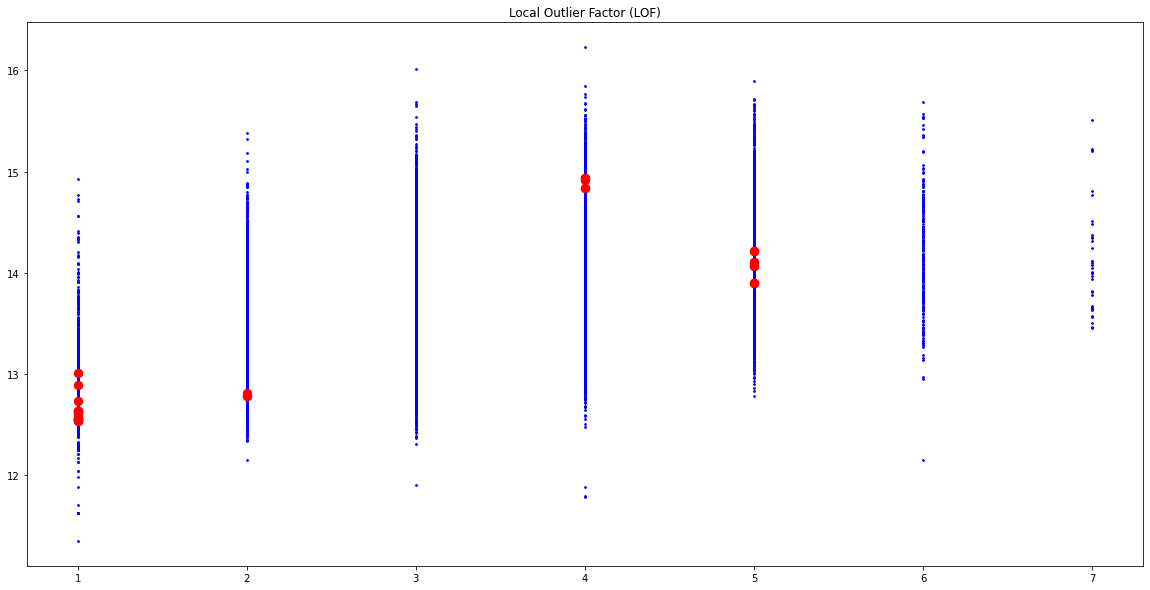

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
colsMahal = ['Rooms','Price']
# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.00075)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(df_test1[colsMahal])

X_scores = clf.negative_outlier_factor_

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]
df_inlier = df_test1[in_mask]
df_outlier = df_test1[out_mask]
plt.figure(figsize=(20, 10))
plt.title("Local Outlier Factor (LOF)")
plt.scatter(df_inlier['Rooms'], df_inlier['Price'], color="b", s=3.0, label="Data points")
plt.scatter(df_outlier['Rooms'], df_outlier['Price'], color="r", s=70.0, label="Data points")

# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())

In [ ]:
x = np.percentile(radius, 99.9)
x
df_test1['radius'] = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
print(df_test1[df_test1['radius']>x].shape)
df_test1[df_test1['radius']>x].head()

(49, 24)


,Rooms,Price,Postcode,Regionname,Propertycount,Distance,CouncilArea,Type_t,Type_u,Type,PriceO,year,month,month_sin,month_cos,year_normalized,SuburbIndex,Method_S,Method_SA,Method_SP,Method_VB,Method,ElipticEnevlopeResults,radius
68,5,13.901689,3130,Eastern Metropolitan,2867,13.4,Whitehorse City Council,0,0,h,1090000.0,2017,1,0.500000,8.660254e-01,0.5,293,1,0,0,0,S,1,0.656592
1609,5,13.993658,3150,South-Eastern Metropolitan,7392,16.7,Monash City Council,0,0,h,1195000.0,2018,1,0.500000,8.660254e-01,1.0,302,1,0,0,0,S,1,0.526137
4745,4,14.933926,3101,Southern Metropolitan,10331,5.4,Boroondara City Council,0,0,h,3060000.0,2017,3,1.000000,6.123234e-17,0.5,346,1,0,0,0,S,1,0.878129
6956,2,12.842652,3060,Northern Metropolitan,5070,13.1,Hume City Council,0,0,h,378000.0,2016,4,0.866025,-5.000000e-01,0.0,121,1,0,0,0,S,1,0.595240
7304,5,13.901689,3133,Eastern Metropolitan,4280,17.2,Whitehorse City Council,0,0,h,1090000.0,2016,4,0.866025,-5.000000e-01,0.0,304,0,0,0,0,PI,1,0.656592


In [ ]:
df_test1['radius'].describe()

count    4.840100e+04
mean     1.535420e-02
std      5.425328e-02
min      0.000000e+00
25%      2.204565e-09
50%      2.204565e-09
75%      2.716808e-09
max      1.000000e+00
Name: radius, dtype: float64

In [ ]:
df_test1.head()

,Rooms,Price,Postcode,Regionname,Propertycount,Distance,CouncilArea,Type_t,Type_u,Type,PriceO,year,month,month_sin,month_cos,year_normalized,SuburbIndex,Method_S,Method_SA,Method_SP,Method_VB,Method,ElipticEnevlopeResults,radius
0,3,14.214287,3067,Northern Metropolitan,4019,3.0,Yarra City Council,0,0,h,1490000.0,2017,1,0.5,0.866025,0.5,277,1,0,0,0,S,1,2.204565e-09
1,3,14.014362,3067,Northern Metropolitan,4019,3.0,Yarra City Council,0,0,h,1220000.0,2017,1,0.5,0.866025,0.5,277,1,0,0,0,S,1,2.204565e-09
2,3,14.166168,3067,Northern Metropolitan,4019,3.0,Yarra City Council,0,0,h,1420000.0,2017,1,0.5,0.866025,0.5,277,1,0,0,0,S,1,2.204565e-09
3,3,14.230927,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council,0,0,h,1515000.0,2017,1,0.5,0.866025,0.5,336,1,0,0,0,S,1,3.761124e-02
4,2,13.415034,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,0,0,h,670000.0,2017,1,0.5,0.866025,0.5,167,1,0,0,0,S,1,2.204565e-09


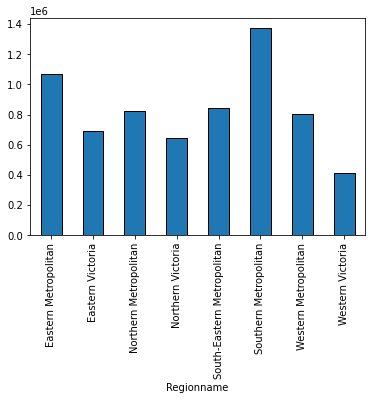

In [ ]:
#plot the distribution of prices per Regionname
df_test1.groupby('Regionname')['PriceO'].mean().plot(kind='bar')

In [ ]:
Regionname = df_test1['Regionname']
df_test1 = pd.get_dummies(df_test1, columns=['Regionname'], drop_first = True)
df_test1['regionname'] = Regionname

In [ ]:
df_test1

,Rooms,Price,Postcode,Propertycount,Distance,CouncilArea,Type_t,Type_u,Type,PriceO,year,month,month_sin,month_cos,year_normalized,SuburbIndex,Method_S,Method_SA,Method_SP,Method_VB,Method,ElipticEnevlopeResults,radius,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,regionname
0,3,14.214287,3067,4019,3.0,Yarra City Council,0,0,h,1490000.0,2017,1,0.5,8.660254e-01,0.5,277,1,0,0,0,S,1,2.204565e-09,0,1,0,0,0,0,0,Northern Metropolitan
1,3,14.014362,3067,4019,3.0,Yarra City Council,0,0,h,1220000.0,2017,1,0.5,8.660254e-01,0.5,277,1,0,0,0,S,1,2.204565e-09,0,1,0,0,0,0,0,Northern Metropolitan
2,3,14.166168,3067,4019,3.0,Yarra City Council,0,0,h,1420000.0,2017,1,0.5,8.660254e-01,0.5,277,1,0,0,0,S,1,2.204565e-09,0,1,0,0,0,0,0,Northern Metropolitan
3,3,14.230927,3040,1543,7.5,Moonee Valley City Council,0,0,h,1515000.0,2017,1,0.5,8.660254e-01,0.5,336,1,0,0,0,S,1,3.761124e-02,0,0,0,0,0,1,0,Western Metropolitan
4,2,13.415034,3042,3464,10.4,Moonee Valley City Council,0,0,h,670000.0,2017,1,0.5,8.660254e-01,0.5,167,1,0,0,0,S,1,2.204565e-09,0,0,0,0,0,1,0,Western Metropolitan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63016,2,12.759098,3199,17055,38.0,Frankston City Council,0,1,u,347700.0,2018,3,1.0,6.123234e-17,1.0,71,0,0,1,0,SP,1,3.966559e-01,0,0,0,1,0,0,0,South-Eastern Metropolitan
63017,3,13.602319,3072,14577,8.4,Darebin City Council,0,0,h,808000.0,2018,3,1.0,6.123234e-17,1.0,221,1,0,0,0,S,1,2.001681e-09,0,1,0,0,0,0,0,Northern Metropolitan
63018,3,13.246351,3064,5833,20.6,Hume City Council,0,0,h,566000.0,2018,3,1.0,6.123234e-17,1.0,30,1,0,0,0,S,1,5.940044e-09,0,1,0,0,0,0,0,Northern Metropolitan
63019,3,13.122365,3064,5833,20.6,Hume City Council,0,0,h,500000.0,2018,3,1.0,6.123234e-17,1.0,30,1,0,0,0,S,1,2.204565e-09,0,1,0,0,0,0,0,Northern Metropolitan


In [ ]:
df_test1.columns


Index(['Rooms', 'Price', 'Postcode', 'Propertycount', 'Distance',
       'CouncilArea', 'Type_t', 'Type_u', 'Type', 'PriceO', 'year', 'month',
       'month_sin', 'month_cos', 'year_normalized', 'SuburbIndex', 'Method_S',
       'Method_SA', 'Method_SP', 'Method_VB', 'Method',
       'ElipticEnevlopeResults', 'radius', 'Regionname_Eastern Victoria',
       'Regionname_Northern Metropolitan', 'Regionname_Northern Victoria',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Western Victoria', 'regionname'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


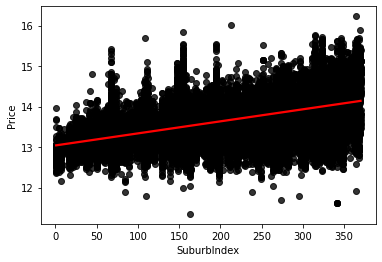

In [ ]:
sns.regplot('SuburbIndex', 'Price', data=df_test1, scatter_kws={"color": "black"}, line_kws={"color": "red"})

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


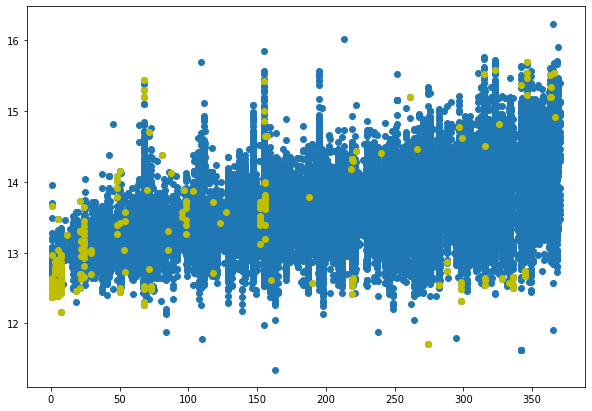

In [ ]:
# Isolation Forests

from sklearn.datasets import make_blobs
from numpy import quantile, random, where
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

IF = IsolationForest(n_estimators=80, contamination = 0.005, n_jobs=4, random_state=42)
cols = ['Price', 'Rooms', 'SuburbIndex', 'Regionname_Eastern Victoria', 'Regionname_Northern Metropolitan',
       'Regionname_Northern Victoria', 'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Western Victoria']
predictions = IF.fit_predict(df_test1[cols]) 

#the scikit learn api would mark outliers with a -1 for us
#let's extract them and plot them 
outlier_index = where(predictions==-1)
values = df_test1.iloc[outlier_index]
plt.figure(figsize=(10, 7)) 
plt.scatter(df_test1['SuburbIndex'], df_test1['Price'])
plt.scatter(values['SuburbIndex'], values['Price'], color='y')

In [ ]:
print(len(np.array(outlier_index).reshape(-1, 1)))

239


In [ ]:
df_test1['IsolationForestResults'] =  1 #Not outlier
for idx in outlier_index:
  df_test1.iloc[idx,-1] = -1 # outlier

In [ ]:
cols

['Price',
 'Rooms',
 'SuburbIndex',
 'Regionname_Eastern Victoria',
 'Regionname_Northern Metropolitan',
 'Regionname_Northern Victoria',
 'Regionname_South-Eastern Metropolitan',
 'Regionname_Southern Metropolitan',
 'Regionname_Western Metropolitan',
 'Regionname_Western Victoria']

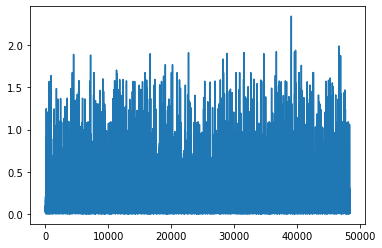

In [ ]:
# Knn
# instantiate model
from sklearn.neighbors import NearestNeighbors
colsC = cols.copy()
colsC.remove('Rooms')
nbrs = NearestNeighbors(n_neighbors = 30, algorithm = 'ball_tree')
# fit model
nbrs.fit(df_test1[colsC])

# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(df_test1[colsC])

# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

# visually determine cutoff values > 2
outlier_index = np.where(distances.mean(axis = 1) > 1.6)

outlier_values = df_test1.iloc[outlier_index]


In [ ]:
outlier_values.shape

(38, 32)

In [ ]:
df_test1['KNN Results'] =  1 #Not outlier
for idx in outlier_index:
  df_test1.iloc[idx,-1] = -1 # outlier

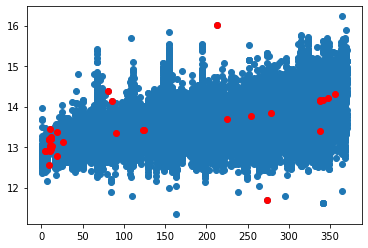

In [ ]:
plt.scatter(df_test1["SuburbIndex"], df_test1["Price"])
plt.scatter(outlier_values["SuburbIndex"], outlier_values["Price"], color = "r")

In [ ]:
#!pip install daal4py

In [ ]:
cols = ['Price', 'Rooms']
df_test1[cols]

,Price,Rooms
0,14.214287,3
1,14.014362,3
2,14.166168,3
3,14.230927,3
4,13.415034,2
...,...,...
63016,12.759098,2
63017,13.602319,3
63018,13.246351,3
63019,13.122365,3


In [ ]:
!pip install daal4py

In [ ]:
import daal4py as d4p

algorithm = d4p.bacon_outlier_detection()
# Compute outliers and get the computed results
res = algorithm.compute(df_test1[['Rooms', 'Price', 'Distance']].to_numpy())

# result provides weights
assert res.weights.shape == (df_test1.shape[0], 1)
# print("\nInput data\n", df_test1)
print("\nOutlier detection result (Default method) weights:\n", res.weights)
# print('All looks good!')



Outlier detection result (Default method) weights:
 [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [ ]:
np.sum(res.weights)

243.0

In [ ]:
print(np.sum(res.weights))
df_test1['BaconResutls'] = res.weights

243.0


In [ ]:
df_test1[df_test1['BaconResutls'] == 0]

,Rooms,Price,Postcode,Propertycount,Distance,CouncilArea,Type_t,Type_u,Type,PriceO,year,month,month_sin,month_cos,year_normalized,SuburbIndex,Method_S,Method_SA,Method_SP,Method_VB,Method,ElipticEnevlopeResults,radius,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,regionname,IsolationForestResults,KNN Results,BaconResutls
0,3,14.214287,3067,4019,3.0,Yarra City Council,0,0,h,1490000.0,2017,1,0.5,8.660254e-01,0.5,277,1,0,0,0,S,1,2.204565e-09,0,1,0,0,0,0,0,Northern Metropolitan,1,1,0.0
1,3,14.014362,3067,4019,3.0,Yarra City Council,0,0,h,1220000.0,2017,1,0.5,8.660254e-01,0.5,277,1,0,0,0,S,1,2.204565e-09,0,1,0,0,0,0,0,Northern Metropolitan,1,1,0.0
2,3,14.166168,3067,4019,3.0,Yarra City Council,0,0,h,1420000.0,2017,1,0.5,8.660254e-01,0.5,277,1,0,0,0,S,1,2.204565e-09,0,1,0,0,0,0,0,Northern Metropolitan,1,1,0.0
3,3,14.230927,3040,1543,7.5,Moonee Valley City Council,0,0,h,1515000.0,2017,1,0.5,8.660254e-01,0.5,336,1,0,0,0,S,1,3.761124e-02,0,0,0,0,0,1,0,Western Metropolitan,1,1,0.0
4,2,13.415034,3042,3464,10.4,Moonee Valley City Council,0,0,h,670000.0,2017,1,0.5,8.660254e-01,0.5,167,1,0,0,0,S,1,2.204565e-09,0,0,0,0,0,1,0,Western Metropolitan,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63016,2,12.759098,3199,17055,38.0,Frankston City Council,0,1,u,347700.0,2018,3,1.0,6.123234e-17,1.0,71,0,0,1,0,SP,1,3.966559e-01,0,0,0,1,0,0,0,South-Eastern Metropolitan,1,1,0.0
63017,3,13.602319,3072,14577,8.4,Darebin City Council,0,0,h,808000.0,2018,3,1.0,6.123234e-17,1.0,221,1,0,0,0,S,1,2.001681e-09,0,1,0,0,0,0,0,Northern Metropolitan,1,1,0.0
63018,3,13.246351,3064,5833,20.6,Hume City Council,0,0,h,566000.0,2018,3,1.0,6.123234e-17,1.0,30,1,0,0,0,S,1,5.940044e-09,0,1,0,0,0,0,0,Northern Metropolitan,1,1,0.0
63019,3,13.122365,3064,5833,20.6,Hume City Council,0,0,h,500000.0,2018,3,1.0,6.123234e-17,1.0,30,1,0,0,0,S,1,2.204565e-09,0,1,0,0,0,0,0,Northern Metropolitan,1,1,0.0


In [ ]:
inline_df = df_test1[df_test1['BaconResutls'] == 0.0]
outlier_df = df_test1[df_test1['BaconResutls'] == 1.0]

In [ ]:
outlier_df.head(90)

,Rooms,Price,Postcode,Propertycount,Distance,CouncilArea,Type_t,Type_u,Type,PriceO,year,month,month_sin,month_cos,year_normalized,SuburbIndex,Method_S,Method_SA,Method_SP,Method_VB,Method,ElipticEnevlopeResults,radius,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,regionname,IsolationForestResults,KNN Results,BaconResutls
146,3,14.118574,3148,3582,11.7,Monash City Council,0,0,h,1354000.0,2017,1,5.000000e-01,0.866025,0.5,251,1,0,0,0,S,1,3.148539e-09,0,0,0,0,1,0,0,Southern Metropolitan,1,1,1.0
342,3,13.764218,3033,5629,11.7,Brimbank City Council,0,0,h,950000.0,2017,1,5.000000e-01,0.866025,0.5,199,1,0,0,0,S,1,2.204565e-09,0,0,0,0,0,1,0,Western Metropolitan,1,1,1.0
345,3,13.535798,3033,5629,11.7,Brimbank City Council,0,0,h,756000.0,2017,1,5.000000e-01,0.866025,0.5,199,1,0,0,0,S,1,2.393528e-09,0,0,0,0,0,1,0,Western Metropolitan,1,1,1.0
347,3,13.429850,3033,5629,11.7,Brimbank City Council,0,1,u,680000.0,2017,1,5.000000e-01,0.866025,0.5,199,1,0,0,0,S,1,2.204565e-09,0,0,0,0,0,1,0,Western Metropolitan,1,1,1.0
1944,3,13.507627,3033,5629,11.7,Brimbank City Council,0,0,h,735000.0,2018,2,8.660254e-01,0.500000,1.0,199,1,0,0,0,S,1,2.204565e-09,0,0,0,0,0,1,0,Western Metropolitan,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21281,3,13.779884,3033,5629,11.7,Brimbank City Council,0,0,h,965000.0,2017,11,-5.000000e-01,0.866025,0.5,199,0,0,1,0,SP,1,2.204565e-09,0,0,0,0,0,1,0,Western Metropolitan,1,1,1.0
21963,3,13.560620,3033,5629,11.7,Brimbank City Council,0,0,h,775000.0,2018,12,-2.449294e-16,1.000000,1.0,199,1,0,0,0,S,1,2.204565e-09,0,0,0,0,0,1,0,Western Metropolitan,1,1,1.0
22694,3,13.652993,3033,5629,11.7,Brimbank City Council,0,0,h,850000.0,2017,12,-2.449294e-16,1.000000,0.5,199,1,0,0,0,S,1,2.204565e-09,0,0,0,0,0,1,0,Western Metropolitan,1,1,1.0
22695,3,13.158697,3033,5629,11.7,Brimbank City Council,1,0,t,518500.0,2017,12,-2.449294e-16,1.000000,0.5,199,0,0,1,0,SP,1,6.525076e-09,0,0,0,0,0,1,0,Western Metropolitan,1,1,1.0


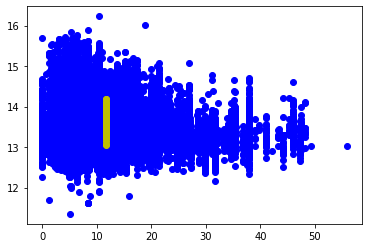

In [ ]:
plt.scatter(inline_df['Distance'], inline_df['Price'], color = 'b')
plt.scatter(outlier_df['Distance'], outlier_df['Price'], color='y')

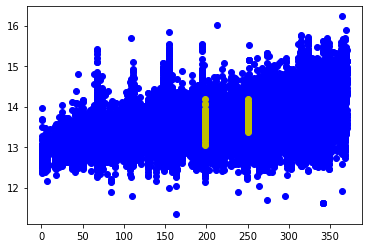

In [ ]:
plt.scatter(inline_df['SuburbIndex'], inline_df['Price'], color = 'b')
plt.scatter(outlier_df['SuburbIndex'], outlier_df['Price'], color='y')

In [ ]:
#we have noticed that BACON is terrible here, so we will drop its column
# df_test1.drop(['BaconResutls'], axis=1, inplace=True)

In [ ]:
from sklearn.neighbors import KernelDensity
from numpy import where, random, array, quantile
from sklearn.preprocessing import scale

kern_dens = KernelDensity()
kern_dens.fit(df_test1[cols])
 
scores = kern_dens.score_samples(df_test1[cols])
threshold = quantile(scores, .0075)
print(threshold)
 
idx = where(scores <= threshold)
values = df_test1.iloc[idx]

-4.198018199033048


In [ ]:
df_test1['KDE Results'] = -1
for i in idx:
  df_test1.iloc[i,-1] = 1


In [ ]:
outlier_df = df_test1[df_test1['KDE Results'] == -1]

In [ ]:
outlier_df[df_test1['KDE Results']==-1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Rooms,Price,Postcode,Propertycount,Distance,CouncilArea,Type_t,Type_u,Type,PriceO,year,month,month_sin,month_cos,year_normalized,SuburbIndex,Method_S,Method_SA,Method_SP,Method_VB,Method,ElipticEnevlopeResults,radius,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,regionname,IsolationForestResults,KNN Results,BaconResutls,KDE Results
0,3,14.214287,3067,4019,3.0,Yarra City Council,0,0,h,1490000.0,2017,1,0.5,8.660254e-01,0.5,277,1,0,0,0,S,1,2.204565e-09,0,1,0,0,0,0,0,Northern Metropolitan,1,1,0.0,-1
1,3,14.014362,3067,4019,3.0,Yarra City Council,0,0,h,1220000.0,2017,1,0.5,8.660254e-01,0.5,277,1,0,0,0,S,1,2.204565e-09,0,1,0,0,0,0,0,Northern Metropolitan,1,1,0.0,-1
2,3,14.166168,3067,4019,3.0,Yarra City Council,0,0,h,1420000.0,2017,1,0.5,8.660254e-01,0.5,277,1,0,0,0,S,1,2.204565e-09,0,1,0,0,0,0,0,Northern Metropolitan,1,1,0.0,-1
3,3,14.230927,3040,1543,7.5,Moonee Valley City Council,0,0,h,1515000.0,2017,1,0.5,8.660254e-01,0.5,336,1,0,0,0,S,1,3.761124e-02,0,0,0,0,0,1,0,Western Metropolitan,1,1,0.0,-1
4,2,13.415034,3042,3464,10.4,Moonee Valley City Council,0,0,h,670000.0,2017,1,0.5,8.660254e-01,0.5,167,1,0,0,0,S,1,2.204565e-09,0,0,0,0,0,1,0,Western Metropolitan,1,1,0.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63016,2,12.759098,3199,17055,38.0,Frankston City Council,0,1,u,347700.0,2018,3,1.0,6.123234e-17,1.0,71,0,0,1,0,SP,1,3.966559e-01,0,0,0,1,0,0,0,South-Eastern Metropolitan,1,1,0.0,-1
63017,3,13.602319,3072,14577,8.4,Darebin City Council,0,0,h,808000.0,2018,3,1.0,6.123234e-17,1.0,221,1,0,0,0,S,1,2.001681e-09,0,1,0,0,0,0,0,Northern Metropolitan,1,1,0.0,-1
63018,3,13.246351,3064,5833,20.6,Hume City Council,0,0,h,566000.0,2018,3,1.0,6.123234e-17,1.0,30,1,0,0,0,S,1,5.940044e-09,0,1,0,0,0,0,0,Northern Metropolitan,1,1,0.0,-1
63019,3,13.122365,3064,5833,20.6,Hume City Council,0,0,h,500000.0,2018,3,1.0,6.123234e-17,1.0,30,1,0,0,0,S,1,2.204565e-09,0,1,0,0,0,0,0,Northern Metropolitan,1,1,0.0,-1


In [ ]:
values

,Rooms,Price,Postcode,Propertycount,Distance,CouncilArea,Type_t,Type_u,Type,PriceO,year,month,month_sin,month_cos,year_normalized,SuburbIndex,Method_S,Method_SA,Method_SP,Method_VB,Method,ElipticEnevlopeResults,radius,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,regionname,IsolationForestResults,KNN Results,BaconResutls
150,7,15.201805,3168,5837,16.7,Monash City Council,0,0,h,4000000.0,2017,1,5.000000e-01,0.866025,0.5,261,1,0,0,0,S,1,1.671904e-08,0,0,0,1,0,0,0,South-Eastern Metropolitan,-1,1,0.0
277,7,14.355507,3150,15321,16.7,Monash City Council,0,0,h,1716000.0,2017,1,5.000000e-01,0.866025,0.5,325,1,0,0,0,S,1,3.235397e-09,0,0,0,0,0,0,0,Eastern Metropolitan,1,1,0.0
454,6,14.411597,3051,6821,1.8,Melbourne City Council,0,0,h,1815000.0,2017,1,5.000000e-01,0.866025,0.5,171,1,0,0,0,S,1,1.975183e-09,0,1,0,0,0,0,0,Northern Metropolitan,1,1,0.0
560,5,15.424949,3141,14887,2.7,Melbourne City Council,0,0,h,5000000.0,2017,1,5.000000e-01,0.866025,0.5,195,0,0,0,1,VB,-1,5.273092e-09,0,0,0,0,1,0,0,Southern Metropolitan,1,1,0.0
669,6,14.253766,3013,6543,6.3,Maribyrnong City Council,0,0,h,1550000.0,2017,1,5.000000e-01,0.866025,0.5,248,1,0,0,0,S,1,1.944014e-09,0,0,0,0,0,1,0,Western Metropolitan,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62596,6,13.629182,3037,5556,18.0,Brimbank City Council,0,0,h,830000.0,2017,12,-2.449294e-16,1.000000,0.5,104,0,0,0,0,PI,1,5.512894e-09,0,0,0,0,0,1,0,Western Metropolitan,1,1,0.0
62621,6,13.937729,3033,5629,11.7,Brimbank City Council,0,0,h,1130000.0,2017,12,-2.449294e-16,1.000000,0.5,199,1,0,0,0,S,1,1.810371e-09,0,0,0,0,0,1,0,Western Metropolitan,1,1,0.0
62674,1,11.626263,3145,8801,8.4,Stonnington City Council,0,1,u,112000.0,2017,12,-2.449294e-16,1.000000,0.5,342,1,0,0,0,S,-1,3.918065e-08,0,0,0,0,1,0,0,Southern Metropolitan,1,1,0.0
62696,6,14.316286,3194,6162,20.0,Kingston City Council,0,0,h,1650000.0,2017,12,-2.449294e-16,1.000000,0.5,219,0,0,1,0,SP,1,2.299788e-09,0,0,0,1,0,0,0,South-Eastern Metropolitan,-1,1,0.0


In [ ]:
df_test1.select_dtypes(include=['float64', 'int64']).columns

Index(['Rooms', 'Price', 'Postcode', 'Propertycount', 'Distance', 'PriceO',
       'year', 'month', 'month_sin', 'month_cos', 'year_normalized',
       'SuburbIndex', 'ElipticEnevlopeResults', 'radius',
       'IsolationForestResults', 'KNN Results', 'BaconResutls', 'KDE Results'],
      dtype='object')

Rooms


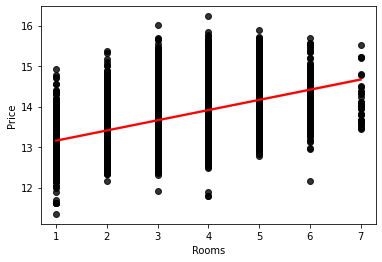

<Figure size 720x504 with 0 Axes>

Propertycount


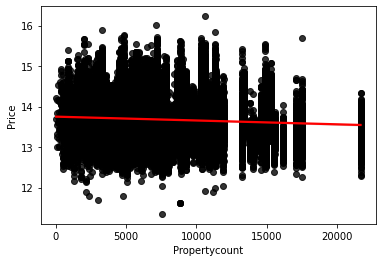

<Figure size 720x504 with 0 Axes>

Distance


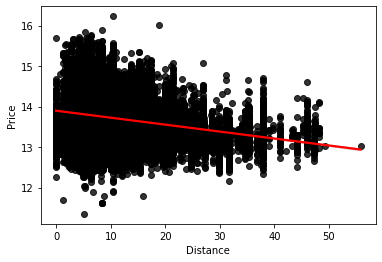

<Figure size 720x504 with 0 Axes>

SuburbIndex


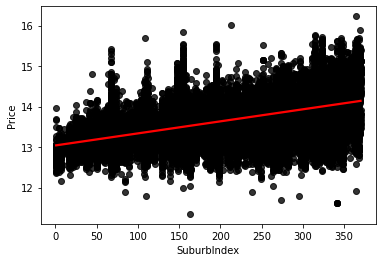

<Figure size 720x504 with 0 Axes>

In [ ]:
#loop over numerical columns
for i in ['Rooms', 'Propertycount', 'Distance',  'SuburbIndex']:
    print(i)
    sns.regplot(x=i, y='Price', data=df_test1, scatter_kws={"color": "black"}, line_kws={"color": "red"})
    plt.figure(figsize=(10, 7))
    plt.show()

In [ ]:
#one class svm for outlier detection
from sklearn.svm import OneClassSVM
model = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = 0.0075).fit(df_test1[['Rooms', 'Distance', 'SuburbIndex', 'Price']])
y_pred = model.predict(df_test1[['Rooms', 'Distance', 'SuburbIndex', 'Price']])
# filter outlier index
outlier_index = where(y_pred == -1) 
# filter outlier values
outlier_values = df_test1.iloc[outlier_index]
outlier_values


,Rooms,Price,Postcode,Propertycount,Distance,CouncilArea,Type_t,Type_u,Type,PriceO,year,month,month_sin,month_cos,year_normalized,SuburbIndex,Method_S,Method_SA,Method_SP,Method_VB,Method,ElipticEnevlopeResults,radius,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,regionname,IsolationForestResults,KNN Results,BaconResutls,KDE Results,OneClassSVMResults
189,2,14.291745,3103,892,7.9,3.0,0,0,1.0,1610000.0,2017,1,5.000000e-01,0.866025,0.5,370,1,0,0,0,2.0,1,1.569817e-09,0,0,0,0,1,0,0,6.0,1,1,0.0,-1,-1
210,4,15.238619,3002,3040,1.3,19.0,0,0,1.0,4150000.0,2017,1,5.000000e-01,0.866025,0.5,274,1,0,0,0,2.0,1,3.283966e-09,0,1,0,0,0,0,0,3.0,1,1,0.0,-1,-1
454,6,14.411597,3051,6821,1.8,19.0,0,0,1.0,1815000.0,2017,1,5.000000e-01,0.866025,0.5,171,1,0,0,0,2.0,1,1.975183e-09,0,1,0,0,0,0,0,3.0,1,1,0.0,1,1
455,1,12.948012,3051,6821,1.8,19.0,0,1,3.0,420000.0,2017,1,5.000000e-01,0.866025,0.5,171,0,0,1,0,4.0,1,2.204565e-09,0,1,0,0,0,0,0,3.0,1,1,0.0,-1,-1
528,3,12.923915,3431,1475,47.4,15.0,0,0,1.0,410000.0,2017,1,5.000000e-01,0.866025,0.5,177,1,0,0,0,2.0,1,2.204565e-09,0,0,1,0,0,0,0,4.0,1,1,0.0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62430,5,14.940440,3103,892,7.9,3.0,0,0,1.0,3080000.0,2017,12,-2.449294e-16,1.000000,0.5,370,1,0,0,0,2.0,1,2.232218e-09,0,0,0,0,1,0,0,6.0,1,1,0.0,-1,-1
62687,3,14.417091,3000,17496,0.0,19.0,0,1,3.0,1825000.0,2017,12,-2.449294e-16,1.000000,0.5,109,0,0,1,0,4.0,1,2.187989e-09,0,1,0,0,0,0,0,3.0,1,1,0.0,-1,-1
62690,2,12.577640,3338,4718,29.8,20.0,0,1,3.0,290000.0,2017,12,-2.449294e-16,1.000000,0.5,1,0,0,1,0,4.0,1,3.043139e-09,0,0,0,0,0,0,1,8.0,-1,1,0.0,-1,-1
62760,3,13.345509,3438,849,48.1,15.0,0,0,1.0,625000.0,2017,12,-2.449294e-16,1.000000,0.5,87,1,0,0,0,2.0,1,2.204565e-09,0,0,1,0,0,0,0,4.0,1,1,0.0,-1,-1


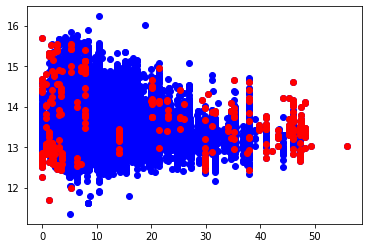

In [ ]:
# visualize outputs
plt.scatter(df_test1["Distance"], df_test1["Price"], color = "b")
plt.scatter(outlier_values["Distance"], outlier_values["Price"], c = "r")

df_test1['OneClassSVMResults'] = -1
for i in idx:
  df_test1.iloc[i,-1] = 1

In [ ]:
df_test1.columns.to_list()

['Rooms',
 'Price',
 'Postcode',
 'Propertycount',
 'Distance',
 'CouncilArea',
 'Type_t',
 'Type_u',
 'Type',
 'PriceO',
 'year',
 'month',
 'month_sin',
 'month_cos',
 'year_normalized',
 'SuburbIndex',
 'Method_S',
 'Method_SA',
 'Method_SP',
 'Method_VB',
 'Method',
 'ElipticEnevlopeResults',
 'radius',
 'Regionname_Eastern Victoria',
 'Regionname_Northern Metropolitan',
 'Regionname_Northern Victoria',
 'Regionname_South-Eastern Metropolitan',
 'Regionname_Southern Metropolitan',
 'Regionname_Western Metropolitan',
 'Regionname_Western Victoria',
 'regionname',
 'IsolationForestResults',
 'KNN Results',
 'BaconResutls',
 'KDE Results',
 'OneClassSVMResults']

<h3>Check The correlation after deleting the outliers for each experiment

In [ ]:
commonCols = [
 'Rooms',
 'Price',
 'Propertycount',
 'Distance',
 'Type_t',
 'Type_u',
 'SuburbIndex',
 'year',
 'month',
  'Method',
  'Type',
  'Postcode',
   'Method_S',
 'Method_SA',
 'Method_SP',
 'Method_VB',
'CouncilArea',
 'month_sin',
 'month_cos',
 'year_normalized',
 'regionname',
 'Regionname_Eastern Victoria',
 'Regionname_Northern Metropolitan',
 'Regionname_Northern Victoria',
 'Regionname_South-Eastern Metropolitan',
 'Regionname_Southern Metropolitan',
 'Regionname_Western Metropolitan',
 'Regionname_Western Victoria',]

In [ ]:
df_test1.columns

Index(['Rooms', 'Price', 'Postcode', 'Propertycount', 'Distance',
       'CouncilArea', 'Type_t', 'Type_u', 'Type', 'PriceO', 'year', 'month',
       'month_sin', 'month_cos', 'year_normalized', 'SuburbIndex', 'Method_S',
       'Method_SA', 'Method_SP', 'Method_VB', 'Method',
       'ElipticEnevlopeResults', 'radius', 'Regionname_Eastern Victoria',
       'Regionname_Northern Metropolitan', 'Regionname_Northern Victoria',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Western Victoria', 'regionname', 'IsolationForestResults',
       'KNN Results', 'BaconResutls', 'KDE Results', 'OneClassSVMResults'],
      dtype='object')

In [ ]:
#linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def ModelLinear(df):
    model = LinearRegression()
    X = df.columns.to_list()
    X.remove('Price')
    y = df['Price']
    X_train, X_test, y_train, y_test = train_test_split(df[X], y, test_size=0.2, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print('r2 score: ', model.score(X_test, y_test))
    return mse

In [ ]:
def experiments(OutlierTechnique):
  #experiment 1: Elliptical Envelope
  commonCols.append(OutlierTechnique)
  df_experiment = df_test1[commonCols].copy()
  commonCols.remove(OutlierTechnique)
  df_experiment = df_experiment[df_experiment[OutlierTechnique] == 1]
  print(np.unique(df_experiment[OutlierTechnique]))
  #Handle the continous and categorical Features
  print("Handling the Continous Features")
  checkCorrelationWithIntervalVariables(df_experiment)
  print("Handling the Categorical Features")
  HandlingCategoricalFeatures(df_experiment)
  return df_experiment

### 4.1 Experiment 1

[1]
Handling the Continous Features


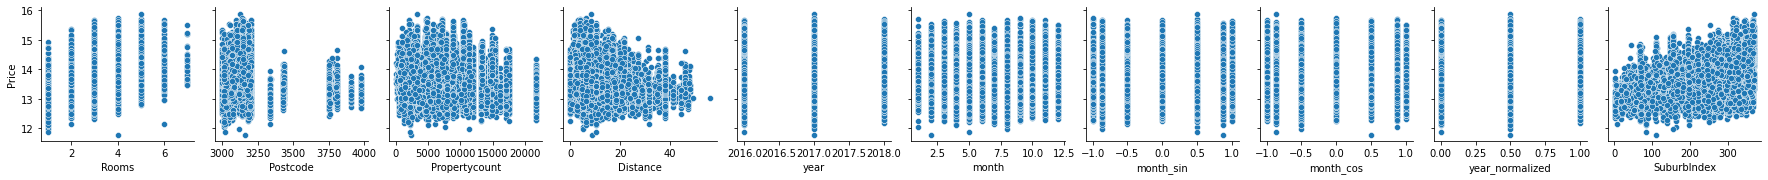

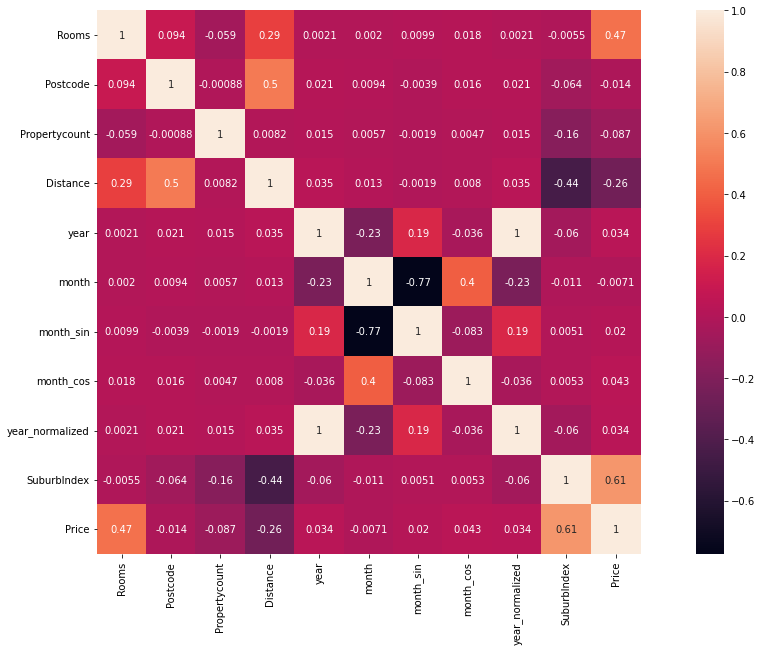

Handling the Categorical Features
CouncilArea  1.0   2.0   3.0   4.0   5.0   ...  30.0  31.0  32.0  33.0  34.0
regionname                                 ...                              
1.0          1693     0   104     0     0  ...  1318     0     0     0     0
2.0             0     0     0     0    51  ...     0     0     0     0   163
3.0          1206     0     0     0     0  ...     0  2053     0  1320     0
4.0             0     0     0     0     0  ...     0     6     0     0    12
5.0             0     0     0     0     0  ...     0     0     0     0     0
6.0             0  2491  3335     0     0  ...     0     0     0     0     0
7.0             0     0     0  2720     0  ...     0     0  1153     0     0
8.0             0     0     0     0     0  ...     0     0     0     0     0

[8 rows x 34 columns]
p value is 0.0
Dependent (reject H0)
Cramer' V: 0.21903430100932406
Method       1.0   2.0  3.0   4.0   5.0
regionname                             
1.0         1002  4863   

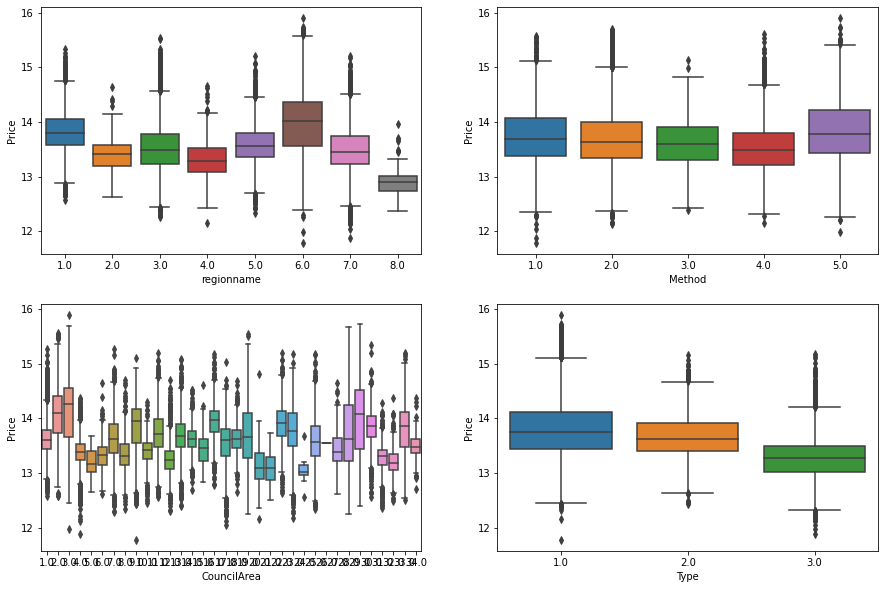

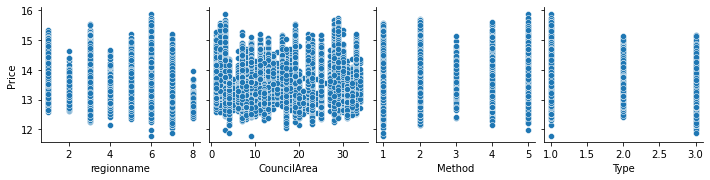

In [ ]:
df_experiment1 = experiments('ElipticEnevlopeResults')

<h3>Conclusion:
<h4>From the correlation above, we can clearly see that Price is correlated linearly with Room, Suburb index, Distance, regionname, CouncilArea, and Type. In this sense, we can drop other columns.

In [ ]:
cols = ['Rooms', 'Distance', 'Type_t', 'Type_u', 'SuburbIndex', 'Regionname_Eastern Victoria', 'Regionname_Northern Metropolitan',
       'Regionname_Northern Victoria', 'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Western Victoria','CouncilArea','Price']
df_experiment1 = df_experiment1[cols]
df_experiment1 = pd.get_dummies(df_experiment1, drop_first = True, columns=['CouncilArea'])
      

<h3>Check The linear regression now <h3>

In [ ]:
ModelLinear(df_experiment1)

r2 score:  0.7386444654836886


0.06275316566454911

### 4.2 Experiment 2

[1]
Handling the Continous Features


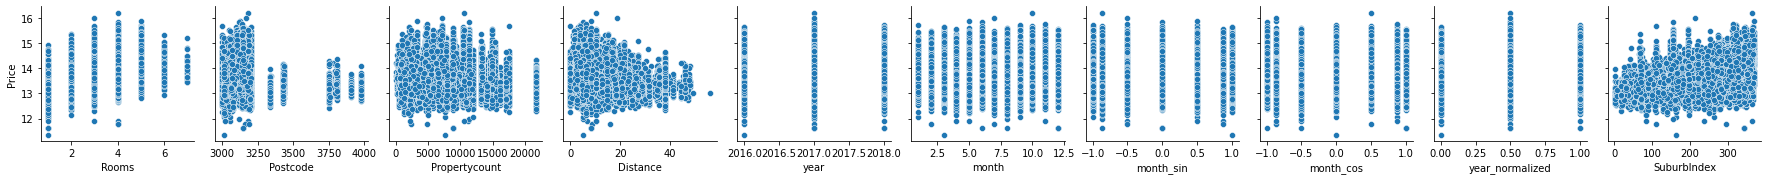

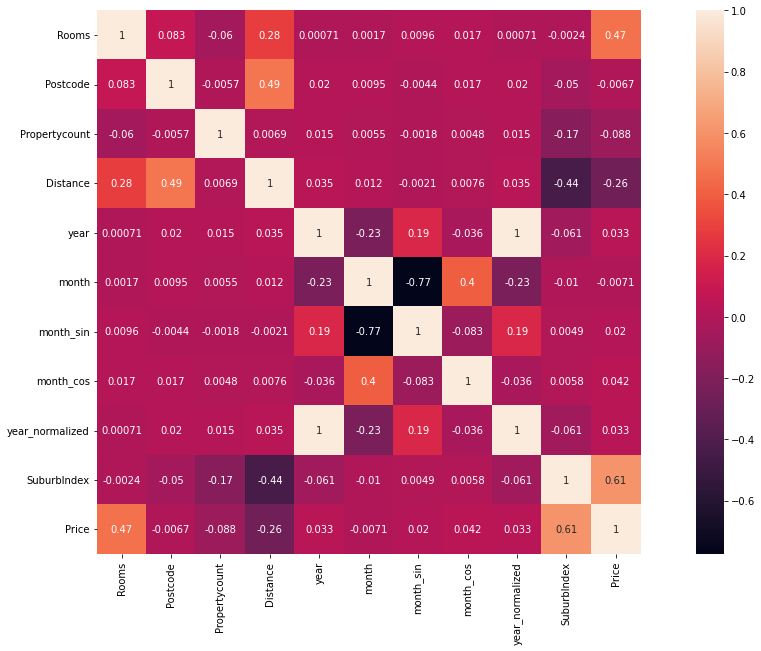

Handling the Categorical Features
CouncilArea  1.0   2.0   3.0   4.0   5.0   ...  30.0  31.0  32.0  33.0  34.0
regionname                                 ...                              
1.0          1693     0   104     0     0  ...  1318     0     0     0     0
2.0             0     0     0     0    32  ...     0     0     0     0   148
3.0          1206     0     0     0     0  ...     0  2053     0  1316     0
4.0             0     0     0     0     0  ...     0     6     0     0    11
5.0             0     0     0     0     0  ...     0     0     0     0     0
6.0             0  2494  3336     0     0  ...     0     0     0     0     0
7.0             0     0     0  2720     0  ...     0     0  1153     0     0
8.0             0     0     0     0     0  ...     0     0     0     0     0

[8 rows x 34 columns]
p value is 0.0
Dependent (reject H0)
Cramer' V: 0.21936922671068682
Method       1.0   2.0  3.0   4.0   5.0
regionname                             
1.0         1002  4863   

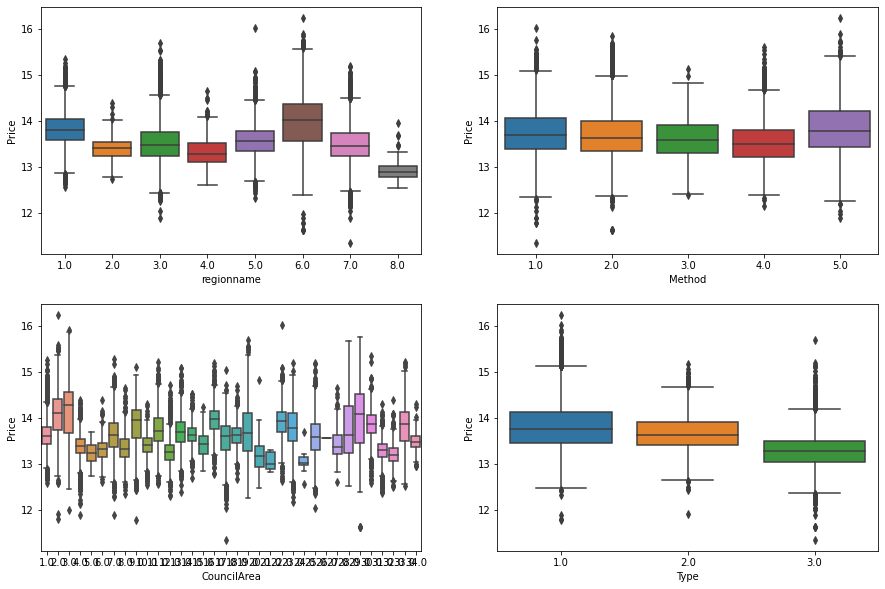

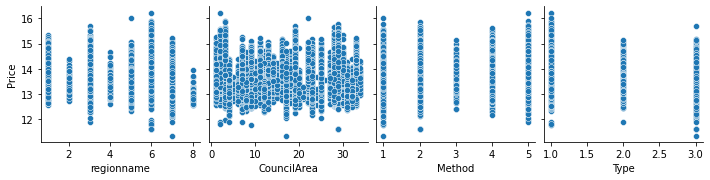

In [ ]:
df_experiment2 = experiments('IsolationForestResults')

<h4>Similar to the Eliptic Enevlope, we will take into consideration ['Rooms', 'Distance', 'Type_t', 'Type_u', 'SuburbIndex', 'Regionname_Eastern Victoria', 'Regionname_Northern Metropolitan',
       'Regionname_Northern Victoria', 'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Western Victoria','CouncilArea','Price']

In [ ]:
cols = ['Rooms', 'Distance', 'Type_t', 'Type_u', 'SuburbIndex', 'Regionname_Eastern Victoria', 'Regionname_Northern Metropolitan',
       'Regionname_Northern Victoria', 'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Western Victoria','CouncilArea','Price']
df_experiment2 = df_experiment2[cols]
df_experiment2 = pd.get_dummies(df_experiment2, drop_first = True, columns=['CouncilArea'])
      

In [ ]:
ModelLinear(df_experiment2)

r2 score:  0.7355119853518597


0.0645131834472952

### 4.3 Experiment 3

[1]
Handling the Continous Features


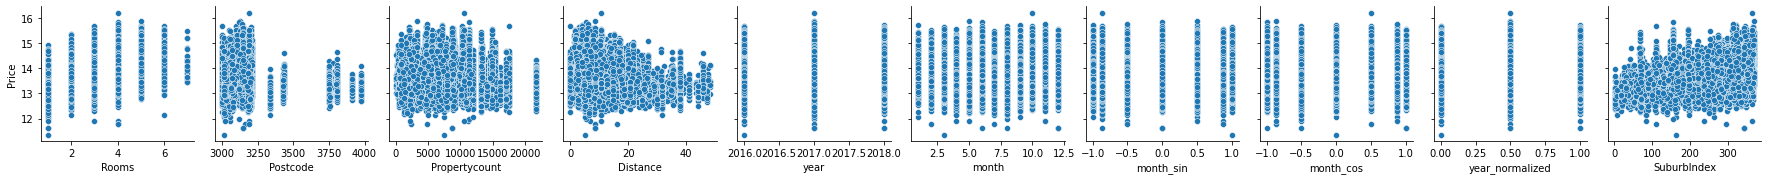

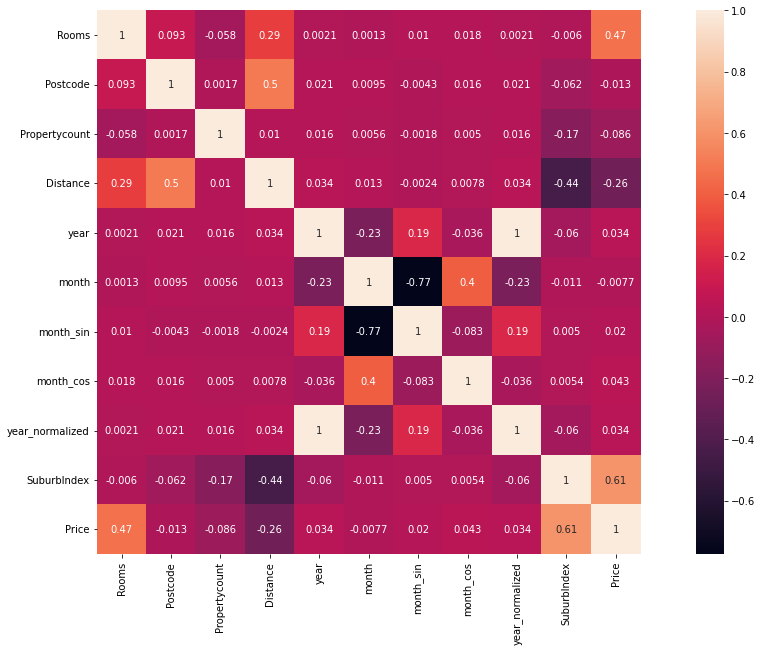

Handling the Categorical Features
CouncilArea  1.0   2.0   3.0   4.0   5.0   ...  30.0  31.0  32.0  33.0  34.0
regionname                                 ...                              
1.0          1693     0   104     0     0  ...  1318     0     0     0     0
2.0             0     0     0     0    50  ...     0     0     0     0   157
3.0          1206     0     0     0     0  ...     0  2053     0  1320     0
4.0             0     0     0     0     0  ...     0     6     0     0     9
5.0             0     0     0     0     0  ...     0     0     0     0     0
6.0             0  2494  3347     0     0  ...     0     0     0     0     0
7.0             0     0     0  2720     0  ...     0     0  1151     0     0
8.0             0     0     0     0     0  ...     0     0     0     0     0

[8 rows x 34 columns]
p value is 0.0
Dependent (reject H0)
Cramer' V: 0.2191086810637904
Method       1.0   2.0  3.0   4.0   5.0
regionname                             
1.0         1002  4863   8

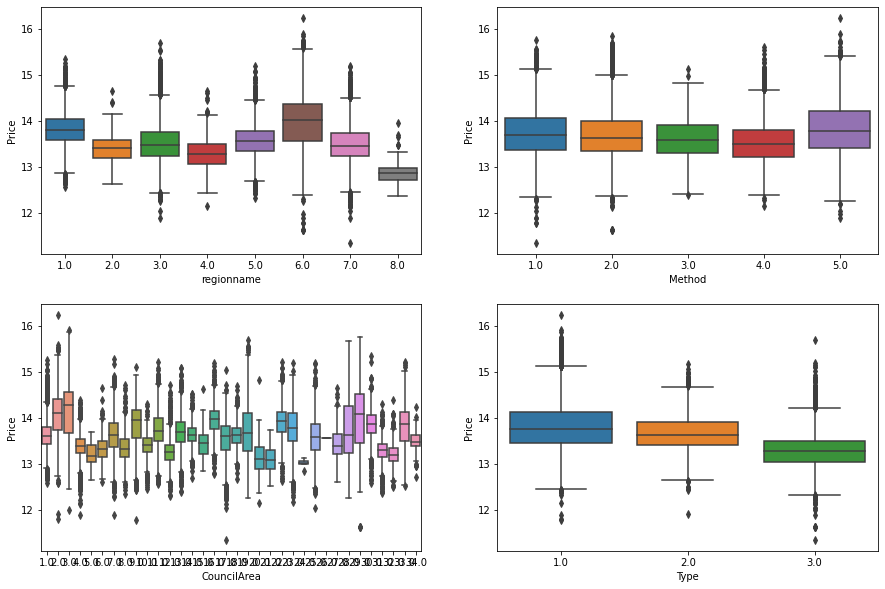

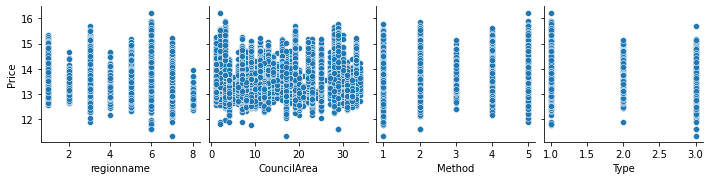

In [ ]:
df_experiment3 = experiments('KNN Results')

<h4> After using the apporpiate techniques to check the correlation, we can see that there is no huge difference in terms of correlation with respect to the price compared to the previous experiments

In [ ]:
cols = ['Rooms', 'Distance', 'Type_t', 'Type_u', 'SuburbIndex', 'Regionname_Eastern Victoria', 'Regionname_Northern Metropolitan',
       'Regionname_Northern Victoria', 'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Western Victoria','CouncilArea','Price']
df_experiment3 = df_experiment3[cols]
df_experiment3 = pd.get_dummies(df_experiment3, drop_first = True, columns=['CouncilArea'])
      

In [ ]:
ModelLinear(df_experiment3)

r2 score:  0.7339475410493296


0.0656370132206981

###4.4 Experiment 4
<h5>Unfortunately, KDE does not work in this scenario, as it considers the whole data as an outlier.

In [ ]:

# #experiment 4: Kernel Density Estimation
# commonCols.append('KDE Results')
# df_experiment4 = df_test1[commonCols].copy()
# commonCols.remove('KDE Results')


### 4.5 Experiment 5
<h5> Bacon did not work in this dataset

In [ ]:
#experiment 5: BACON
#commonCols.append('BaconResutls')
#df_experiment5 = df_test1[commonCols].copy()
#commonCols.remove('BaconResutls')

### 4.6 Experiment 6

In [ ]:
#experiment 6: Local Outlier Factor
commonCols.append('radius')
df_experiment6 = df_test1[commonCols].copy()
commonCols.remove('radius')


In [ ]:
df_experiment6 =  df_experiment6[df_experiment6['radius'] >= 0.1]


[0.10014481 0.1001516  0.10028137 ... 0.86405332 0.87812865 1.        ]
Handling the Continous Features


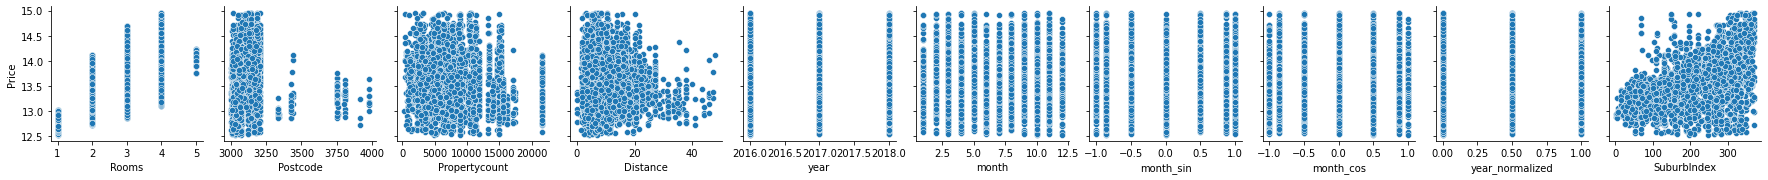

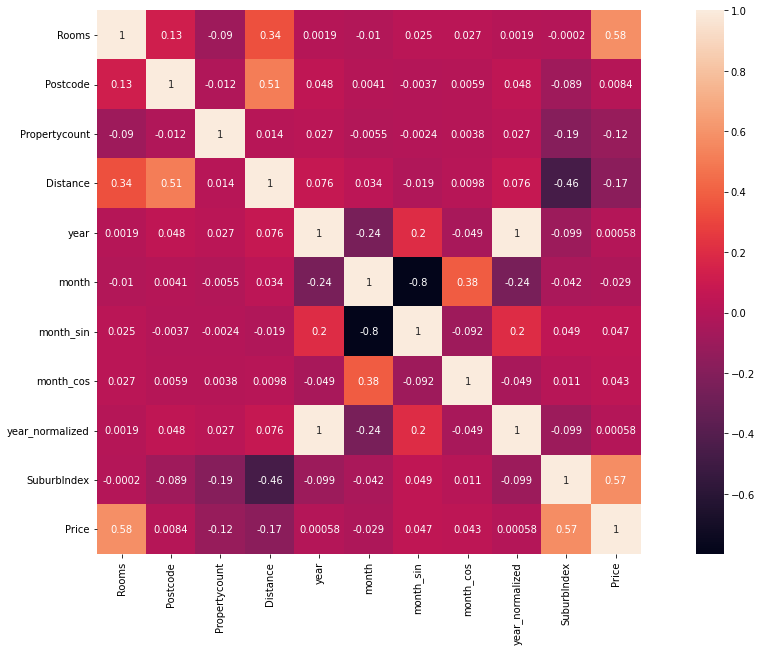

Handling the Categorical Features
CouncilArea  1.0   2.0   3.0   4.0   5.0   ...  28.0  29.0  30.0  31.0  32.0
regionname                                 ...                              
1.0            84     0     8     0     0  ...    97     0     0     0     0
2.0             0     0     0     0     4  ...     0     0     0     0     9
3.0            67     0     0     0     0  ...     0   138     0   102     0
4.0             0     0     0     0     0  ...     0     0     0     0     1
5.0             0     0     0     0     0  ...     0     0     0     0     0
6.0             0   133   201     0     0  ...     0     0     0     0     0
7.0             0     0     0   123     0  ...     0     0    92     0     0
8.0             0     0     0     0     0  ...     0     0     0     0     0

[8 rows x 32 columns]
p value is 0.0
Dependent (reject H0)
Cramer' V: 0.21270556458559176
Method      1.0  2.0  3.0  4.0  5.0
regionname                         
1.0          20  397    3   45   

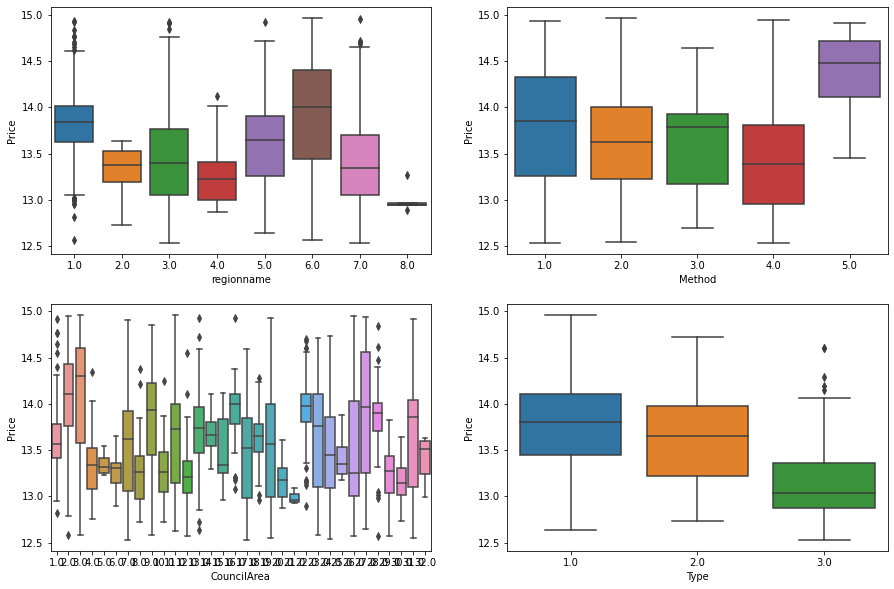

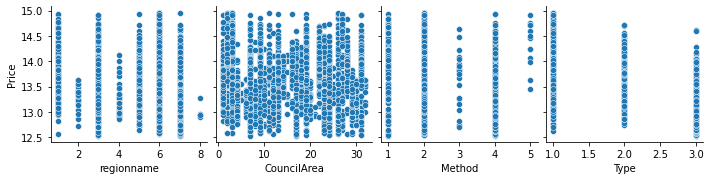

In [ ]:
print(np.unique(df_experiment6['radius']))
#Handle the continous and categorical Features
print("Handling the Continous Features")
checkCorrelationWithIntervalVariables(df_experiment6)
print("Handling the Categorical Features")
HandlingCategoricalFeatures(df_experiment6)

<h5> Now, we can see that Method has a huge effect on the Price, so we will add method as an input. In this sense, we will use cols = ['Rooms', 'Distance', 'Type_t', 'Type_u', 'SuburbIndex', 'Regionname_Eastern Victoria', 'Regionname_Northern Metropolitan','Regionname_Northern Victoria', 'Regionname_South-Eastern Metropolitan','Regionname_Southern Metropolitan','Regionname_Western Metropolitan','Regionname_Western Victoria','CouncilArea','Price',   'Method_S','Method_SA','Method_SP','Method_VB']

In [ ]:
cols = ['Rooms', 'Distance', 'Type_t', 'Type_u', 'SuburbIndex', 'Regionname_Eastern Victoria', 'Regionname_Northern Metropolitan',
       'Regionname_Northern Victoria', 'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Western Victoria','CouncilArea','Price',   'Method_S',
 'Method_SA',
 'Method_SP',
 'Method_VB',]
df_experiment6 = df_experiment6[cols]
df_experiment6 = pd.get_dummies(df_experiment6, drop_first = True, columns=['CouncilArea'])

In [ ]:
ModelLinear(df_experiment6)

r2 score:  0.7923945158816232


0.057571829957145916

### 4.7 Experiment 7

[1]
Handling the Continous Features


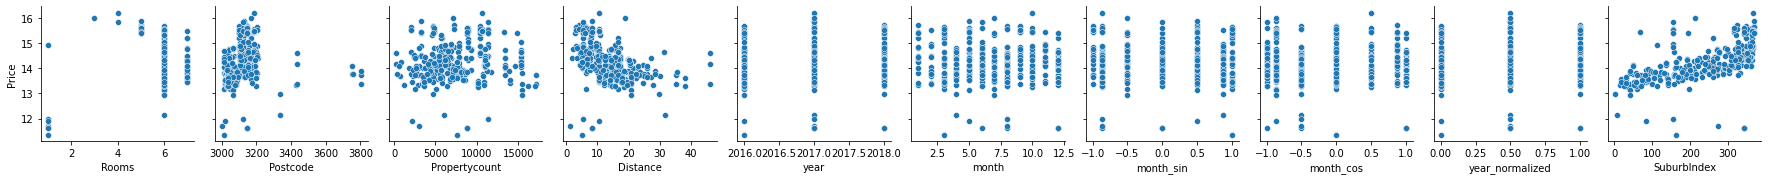

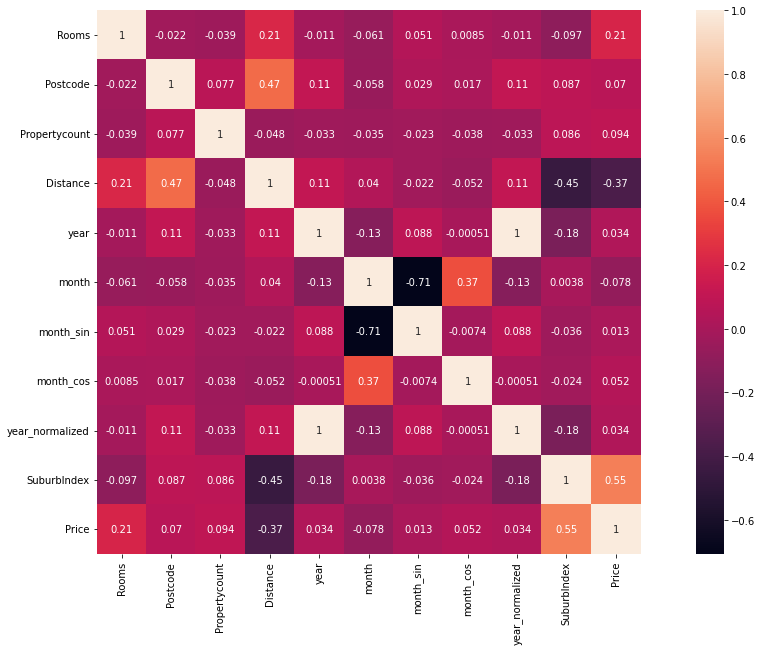

Handling the Categorical Features
CouncilArea  1.0   2.0   3.0   4.0   5.0   ...  26.0  27.0  28.0  29.0  30.0
regionname                                 ...                              
1.0             5     0     1     0     0  ...    16     0     0     0     0
2.0             0     0     0     0     2  ...     0     0     0     0     1
3.0             7     0     0     0     0  ...     0     6     0     2     0
4.0             0     0     0     0     0  ...     0     0     0     0     0
5.0             0     0     0     0     1  ...     0     0     0     0     0
6.0             0    19    59     0     0  ...     0     0     0     0     0
7.0             0     0     0    38     0  ...     0     0     3     0     0
8.0             0     0     0     0     0  ...     0     0     0     0     0

[8 rows x 30 columns]
p value is 4.5613987862089745e-282
Dependent (reject H0)
Cramer' V: 0.25414786889651036
Method      1.0  2.0  3.0  4.0  5.0
regionname                         
1.0          

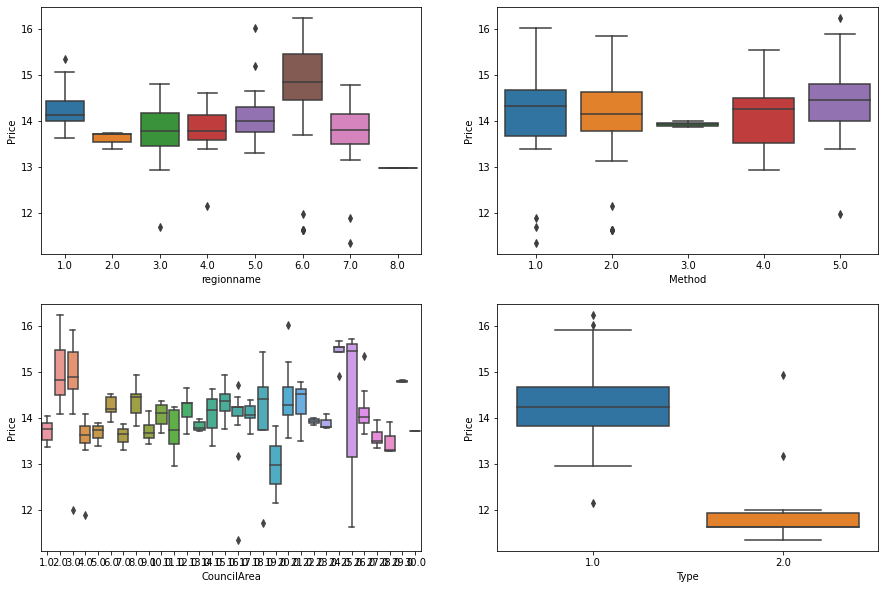

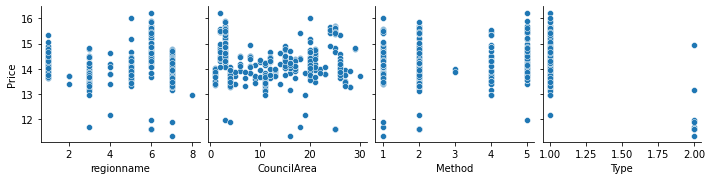

In [ ]:
df_experiment7 = experiments('OneClassSVMResults')

<h5> From the graphs and plots above, we can clearly see that there is a correlation between the Price and the other ones mentioned in experiment 6

In [ ]:
cols = ['Rooms', 'Distance', 'Type_t', 'Type_u', 'SuburbIndex', 'Regionname_Eastern Victoria', 'Regionname_Northern Metropolitan',
       'Regionname_Northern Victoria', 'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Western Victoria','CouncilArea','Price',   'Method_S',
 'Method_SA',
 'Method_SP',
 'Method_VB',]
df_experiment7 = df_experiment7[cols]
df_experiment7 = pd.get_dummies(df_experiment7, drop_first = True, columns=['CouncilArea'])

In [ ]:
ModelLinear(df_experiment7)

r2 score:  0.6610199895656327


0.12647928682638507

### 4.8 Experiment 8

'No Outliers'

Handling the Continous Features


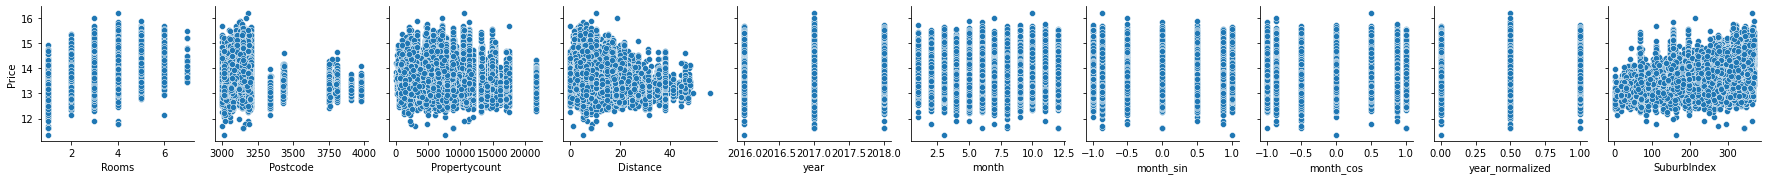

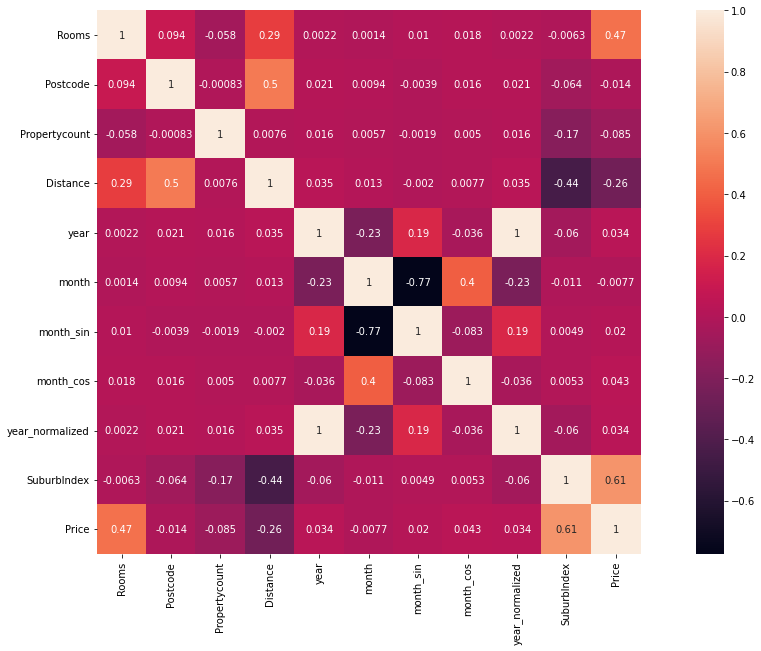

Handling the Categorical Features
CouncilArea  1.0   2.0   3.0   4.0   5.0   ...  30.0  31.0  32.0  33.0  34.0
regionname                                 ...                              
1.0          1693     0   104     0     0  ...  1318     0     0     0     0
2.0             0     0     0     0    51  ...     0     0     0     0   163
3.0          1206     0     0     0     0  ...     0  2053     0  1320     0
4.0             0     0     0     0     0  ...     0     6     0     0    12
5.0             0     0     0     0     0  ...     0     0     0     0     0
6.0             0  2494  3347     0     0  ...     0     0     0     0     0
7.0             0     0     0  2720     0  ...     0     0  1153     0     0
8.0             0     0     0     0     0  ...     0     0     0     0     0

[8 rows x 34 columns]
p value is 0.0
Dependent (reject H0)
Cramer' V: 0.21904455563281194
Method       1.0   2.0  3.0   4.0   5.0
regionname                             
1.0         1002  4863   

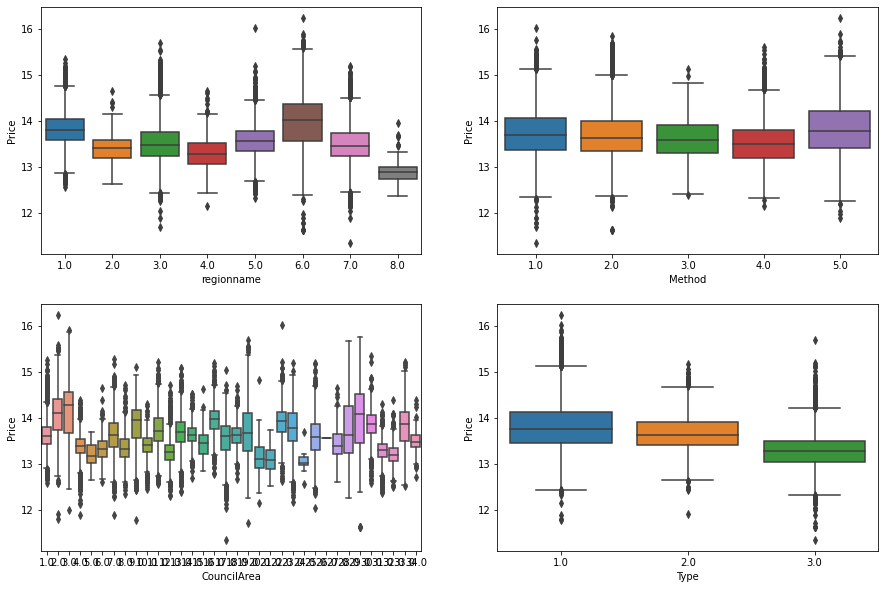

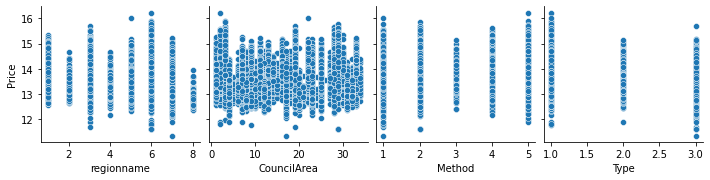

In [ ]:
df_experiment8 = df_test1
#Handle the continous and categorical Features
print("Handling the Continous Features")
checkCorrelationWithIntervalVariables(df_experiment8)
print("Handling the Categorical Features")
HandlingCategoricalFeatures(df_experiment8)

<h5> We can conclude that from above: <h5>
- In categorical Part, we can see councilArea and regionName are correlated to the price. 
- In Continous Part, we can see that Distance, Rooms, and suburbIndex are correlated to the price

In [ ]:
cols = ['Rooms', 'Distance', 'SuburbIndex', 'Regionname_Eastern Victoria', 'Regionname_Northern Metropolitan',
       'Regionname_Northern Victoria', 'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Western Victoria','CouncilArea','Price']
df_experiment8 = df_experiment8[cols]
df_experiment8 = pd.get_dummies(df_experiment8, drop_first = True, columns=['CouncilArea'])

In [ ]:
ModelLinear(df_experiment8)

r2 score:  0.643439515313957


0.08719428953559837

<h5> 
We can conclude from the experiments above that outliers are quite sensitive and giving to the model meaningful features is important to have good accuracy. From above, we can see that r2 score has surged to 80% using LOF technique with taking meaningful features to the model compared to the model whose data has outliers (64%). 

## References: 
We depended on our documents only. The dataset from doctor Nouri Google Drive